### Машинное обучение и Python

In [1]:
import pandas as pd

In [28]:
data = pd.read_csv('data/car_spd_dst.csv', header = 2) # игнорируем 2 первые строки
data

,Speed,Distance
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


### Задача

Построить модель, которая бы предсказала скорость по заданной дистанции

<Axes: xlabel='Speed', ylabel='Distance'>

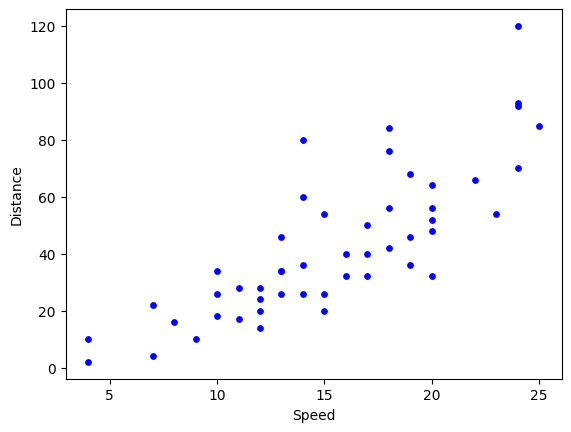

In [27]:
data.plot.scatter(x = 'Speed', y = 'Distance', s = 15, c = 'blue')

In [45]:
X = data.iloc[:, :-1].values # предикторы
X 

array([[ 4],
       [ 4],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [10],
       [10],
       [11],
       [11],
       [12],
       [12],
       [12],
       [12],
       [13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [15],
       [15],
       [15],
       [16],
       [16],
       [17],
       [17],
       [17],
       [18],
       [18],
       [18],
       [18],
       [19],
       [19],
       [19],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [23],
       [24],
       [24],
       [24],
       [24],
       [25]], dtype=int64)

In [46]:
Y = data.iloc[:, -1].values # целевые переменные
Y

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [72]:
from sklearn.model_selection import train_test_split # импортируем нужную библиотеку

In [75]:
# Деление выборки на обучающую и проверочную
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [73]:
from sklearn.linear_model import LinearRegression

In [54]:
myModel = LinearRegression() # создаем модель по линейной регрессии

In [83]:
myModel.fit(x_train, y_train) # Собственно обучение

LinearRegression()

In [84]:
y_pred = myModel.predict(x_test) # набор предсказанных значений
y_pred

array([41.55947137, 30.43171806, 60.10572687, 74.94273128, 48.97797357,
       23.01321586, 52.68722467, 74.94273128, 60.10572687, 11.88546256,
       41.55947137, 60.10572687, 30.43171806, 19.30396476, 60.10572687])

In [85]:
y_test

array([54, 20, 52, 93, 50, 34, 84, 92, 48,  4, 26, 32, 24, 10, 64],
      dtype=int64)

Теперь будем считать ошибку

In [76]:
from sklearn import metrics

In [86]:
MAE = metrics.mean_absolute_error(y_test, y_pred) # сначала тестовое, затем предсказанное
MAE

12.846696035242287